In [15]:
##Part 1 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans 
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
npdat = np.array([['','Cool','Beans'],
                ['1',9,6],
                ['2',6,9]])
npdat

array([['', 'Cool', 'Beans'],
       ['1', '9', '6'],
       ['2', '6', '9']], dtype='<U5')

In [17]:
pdfrm=(pd.DataFrame(data=npdat[1:,1:],index=npdat[1:,0],columns=npdat[0,1:]))
pdfrm

,Cool,Beans
1,9,6
2,6,9


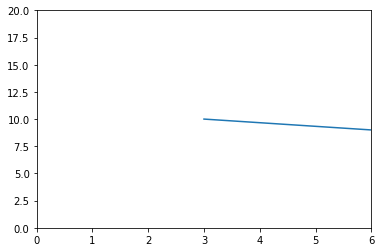

In [18]:
plt.plot([3, 6, 9, 10], [10, 9, 6, 3])
plt.axis([0, 6, 0, 20])
plt.show()

In [19]:
df1 = 'https://raw.githubusercontent.com/datach33z3/ML540/master/Framingham_Training'
fram_train = pd.read_csv(df1, error_bad_lines = False)
Train = pd.DataFrame(fram_train[['Sex','Age']])
Traink1 = KMeans(n_clusters = 4).fit(Train)
Traink1
Clust = Traink1.labels_
Train1Clust1 = Train.loc[Clust == 0]
Train1Clust1.describe()

,Sex,Age
count,2607.000000,2607.000000
mean,1.562332,51.134254
std,0.496195,2.528958
min,1.000000,47.000000
25%,1.000000,49.000000
50%,2.000000,51.000000
75%,2.000000,53.000000
max,2.000000,55.000000


In [20]:
##Part 2

In [21]:
# Looking at the goal of this dataset it would begood to use a linear regression
# because we are looking to predict the picring of a house rather than just doing
# some sort of classification and because we are looking to predict a variable 
# dependant on several variables it makes the most sense. If were looking at 
# classifing houses location dependant on priceing we might look at using some sort 
# of K means but this is not the case 
df = 'https://raw.githubusercontent.com/datach33z3/ML540/master/Real.csv'
re = pd.read_csv(df, error_bad_lines=False)
re.head()

,No,X1transactiondate,X2houseage,X3distancetothenearestMRTstation,X4numberofconveniencestores,X5latitude,X6longitude,Yhousepriceofunitarea
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [22]:
re.describe()

,No,X1transactiondate,X2houseage,X3distancetothenearestMRTstation,X4numberofconveniencestores,X5latitude,X6longitude,Yhousepriceofunitarea
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [23]:
# No and Transaction date will be dropped as they are not needed in this
# They do not provide any information that s needed 

In [24]:
re.drop(['No'], axis=1, inplace=True)
re.drop(['X1transactiondate'],axis=1, inplace=True)

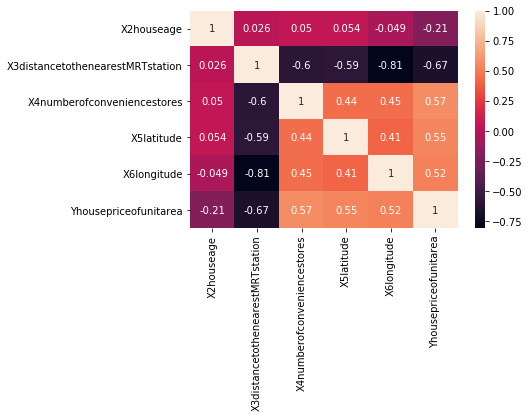

In [25]:
plt.figure()
sns.heatmap(re.corr(),annot=True)

In [26]:
# As far as the Data goes we can clearly see that the most correlation 
# is in the number of surrounding convenience stores though Logitude and 
# Latitude is high as well so we will stick with those three.
# We can now split the data with a 80/20 split 
re.drop(['X2houseage'],axis=1, inplace=True)
re.drop(['X3distancetothenearestMRTstation'],axis=1, inplace=True)

In [27]:
np.random.seed(0)
re_train,re_test = train_test_split(re, train_size=0.80, test_size=0.20)

In [28]:
# Separation of Y
rey_train = re_train.pop('Yhousepriceofunitarea')
reX_train = re_train

In [29]:
#Fit the model Linear
lm = LinearRegression()
lm.fit(reX_train, rey_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
reX_train_lm = sm.add_constant(reX_train)
lm_1 = sm.OLS(rey_train, reX_train).fit()

In [31]:
# Now we will evaluate the variables using vif to be sure they are 
#statistically signifiant 
vif = pd.DataFrame()
X = reX_train_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,79934236.31
1,X4numberofconveniencestores,1.37
3,X6longitude,1.35
2,X5latitude,1.32


In [32]:
# All of the features are 
# Now we will pop the test data so that we can separate the X and y data
rey_test = re_test.pop('Yhousepriceofunitarea')
reX_test = re_test

In [33]:
rey_test_pred = lm_1.predict(reX_test)

In [34]:
preddf = pd.DataFrame({'Actual':rey_test,'Predictions':rey_test_pred})
preddf['Predictions']= round(preddf['Predictions'])
preddf.head()

,Actual,Predictions
356,45.3,33.0
170,14.4,25.0
224,46.0,45.0
331,15.6,25.0
306,50.2,33.0


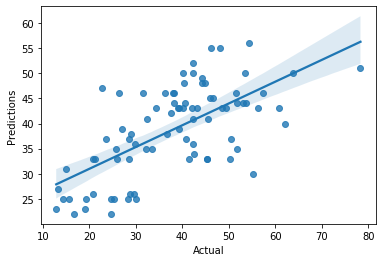

In [35]:
sns.regplot('Actual','Predictions',data=preddf)

In [36]:
# Its clear that with the current features we are seeing a pretty bad
# model we should re-evaluate adding the 2 dropped variables again
print('Squared Error',metrics.mean_squared_error(rey_test,rey_test_pred))

Squared Error 100.33534514760721
